In [11]:
import glob
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nibabel as nib
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix, plot_stat_map
import os
import pandas as pd
import pickle
import re

import sys
sys.path.append('/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_fmri/analysis/01_level1')
from level1_utils import run_level1, make_level1_design_matrix, get_events

In [2]:
data_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/bids_nifti_wface/'
behavior_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/behavioral_data/all_trials.csv'
out_path = os.path.join(data_path, "derivatives/nilearn/glm/level1/")

subnum = '01'

In [ ]:
# run_level1(subnum, data_path, behavior_path, out_path)

In [ ]:
# contrast_id = 'valDiff'
# zmap = nib.load(os.path.join(out_path, 'sub-%s/contrasts/sub-%s_run-%s_%s.nii.gz'%(subnum, subnum, runnum, contrast_id)))
# plot_stat_map(zmap, threshold=3.0, title='sub-%s_run-%s_%s' % (subnum, runnum, contrast_id))

A 'modulation' column was found in the given events data and is used.


/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/_utils/glm.py:310: UserWarning: Matrix is singular at working precision, regularizing...
  warn('Matrix is singular at working precision, regularizing...')


<AxesSubplot:label='conditions', ylabel='scan number'>

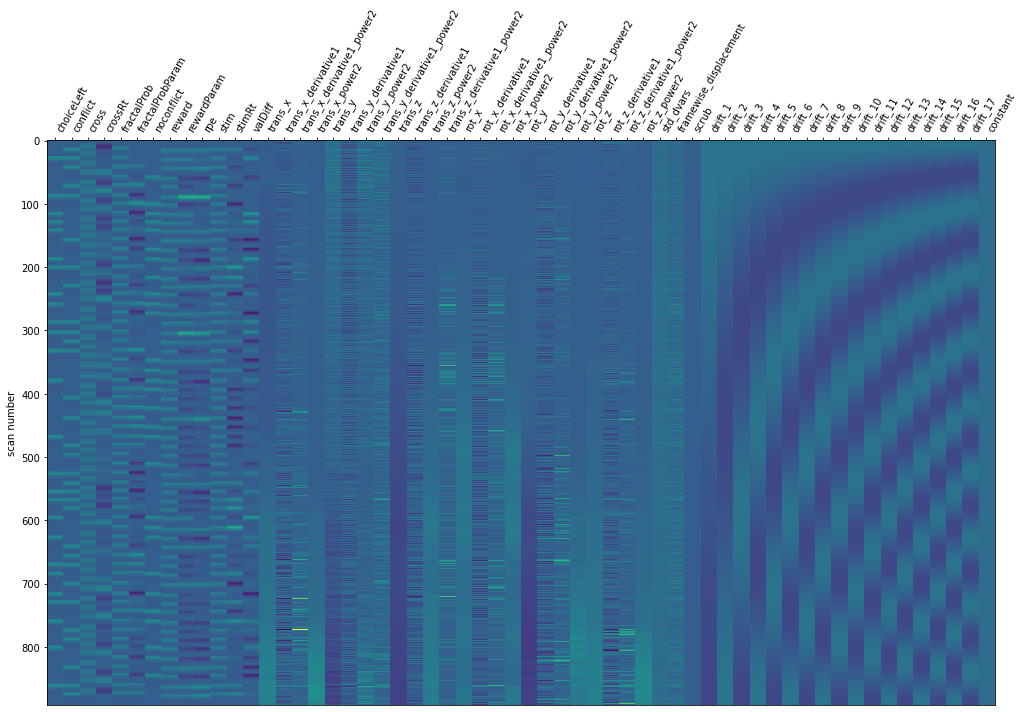

In [3]:
runnum='4'
design_matrix= make_level1_design_matrix(subnum, runnum, data_path, behavior_path, hrf_model = 'spm', drift_model='cosine')
plot_design_matrix(design_matrix)

In [4]:
beh_regs = ['cross', 'crossRt', 'fractalProb', 'fractalProbParam', 'stim', 'stimRt', 'valDiff', 'choiceLeft', 'conflict', 'noconflict', 'reward', 'rewardParam', 'rpe']
pd.DataFrame(np.corrcoef(design_matrix[beh_regs], rowvar=False))
# design_matrix[beh_regs]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.000112,-0.507547,0.044355,-0.780758,-0.032182,0.034732,-0.425133,-0.392530,-0.500566,-0.634884,-0.035879,-0.035746
1,0.000112,1.000000,-0.248806,-0.039051,-0.181907,-0.088604,-0.015770,-0.103817,-0.156105,-0.051160,-0.101781,-0.037698,-0.006649
2,-0.507547,-0.248806,1.000000,0.006043,0.761268,0.001233,-0.003176,0.389165,0.443491,0.426543,0.027088,-0.009622,0.000569
3,0.044355,-0.039051,0.006043,1.000000,0.002346,-0.204501,0.051278,-0.100156,0.071532,-0.069736,0.032470,-0.178029,0.027677
4,-0.780758,-0.181907,0.761268,0.002346,1.000000,0.000264,-0.008006,0.511309,0.578851,0.564072,0.590911,-0.008592,0.000758
5,-0.032182,-0.088604,0.001233,-0.204501,0.000264,1.000000,0.002299,0.110439,0.048601,-0.048910,-0.096463,0.127504,0.052850
6,0.034732,-0.015770,-0.003176,0.051278,-0.008006,0.002299,1.000000,0.510241,0.065866,-0.075906,-0.006969,0.115119,-0.020192
7,-0.425133,-0.103817,0.389165,-0.100156,0.511309,0.110439,0.510241,1.000000,0.232108,0.353085,0.291750,0.036413,-0.060061
8,-0.392530,-0.156105,0.443491,0.071532,0.578851,0.048601,0.065866,0.232108,1.000000,-0.346810,0.337897,0.243252,0.302601
9,-0.500566,-0.051160,0.426543,-0.069736,0.564072,-0.048910,-0.075906,0.353085,-0.346810,1.000000,0.337522,-0.256205,-0.305549


In [13]:
formatted_events = get_events(subnum, runnum, data_path, behavior_path, regress_rt=1)

In [28]:
formatted_events.query('(trial_type == "conflict" | trial_type == "noconflict" ) & modulation == 1')[0:10]

,onset,duration,trial_type,modulation
8,8.060577,0.972081,conflict,1.0
19,22.133918,0.972081,conflict,1.0
31,36.207245,0.972081,conflict,1.0
46,52.314899,0.972081,noconflict,1.0
58,65.387724,0.972081,conflict,1.0
74,81.478734,0.972081,conflict,1.0
87,94.568253,0.972081,noconflict,1.0
96,109.658746,0.972081,noconflict,1.0
112,122.731607,0.972081,noconflict,1.0
122,135.837830,0.972081,noconflict,1.0


In [29]:
formatted_events.query('trial_type == "stim"')[0:10]

,onset,duration,trial_type,modulation
6,8.060577,0.972081,stim,1.0
18,22.133918,0.972081,stim,1.0
32,36.207245,0.972081,stim,1.0
45,52.314899,0.972081,stim,1.0
57,65.387724,0.972081,stim,1.0
72,81.478734,0.972081,stim,1.0
83,94.568253,0.972081,stim,1.0
100,109.658746,0.972081,stim,1.0
110,122.731607,0.972081,stim,1.0
126,135.837830,0.972081,stim,1.0
